# Importing Libraries

In [1]:
import time

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OrdinalEncoder 
oe = OrdinalEncoder()

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [5]:
import torch
from torch.nn.functional import mse_loss

# Task 1

In [6]:
data = pd.read_csv('Data/Customer Churn.csv')
data = data.drop('CustomerID',axis=1)

In [7]:
data['Gender'] = oe.fit_transform(data[['Gender']])
data['EmailOptIn'] = oe.fit_transform(data[['EmailOptIn']])
data['PromotionResponse'] = oe.fit_transform(data[['PromotionResponse']])

In [8]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size=0.3,
                                        stratify=X['Gender'],
                                        random_state=1
                                        )

## AdaBoost Classifier

In [10]:
from sklearn.ensemble import AdaBoostClassifier

### Hyper Paramter Tuning

In [11]:
model = AdaBoostClassifier()

grid = {
    'n_estimators': [50, 100, 200, 400, 800],
    'learning_rate': [10**i for i in range(-5, 1 + 1)],
    'algorithm': ['SAMME', 'SAMME.R'],
}

cv = RepeatedStratifiedKFold(
    n_splits=10,
    n_repeats=3,
    random_state=1
    )

In [12]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=grid,
    n_jobs=-1,
    cv=cv,
    scoring='accuracy'
    )

grid_result = grid_search.fit(X_train, y_train)

In [13]:
print(f"Highest Accuracy: {grid_result.best_score_:.4f}")
print(f"Hyper Parameter Values: {grid_result.best_params_}")

Highest Accuracy: 0.5343
Hyper Parameter Values: {'algorithm': 'SAMME', 'learning_rate': 1e-05, 'n_estimators': 50}


### Final Model

In [14]:
start_time = time.time()

adb = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1e-5,
    algorithm='SAMME',
    random_state=1
    )

adb_model = adb.fit(X_train,
                    y_train)

end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

Execution time: 0.055687904357910156 seconds


## Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

### Hyper Paramter Tuning

In [16]:
model = RandomForestClassifier()

grid = { 
    'n_estimators': [25 * i for i in range(1, 10 + 1)], 
    'max_features': ['sqrt', 'log2'], 
    'max_depth': [3 * i for i in range(1, 5 + 1)], 
    'max_leaf_nodes': [2, 5, 10, 20, 50], 
}

cv = RepeatedStratifiedKFold(
    n_splits=10,
    n_repeats=3,
    random_state=1
    )

In [17]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=grid,
    n_jobs=-1,
    cv=cv,
    scoring='accuracy'
    )

grid_result = grid_search.fit(X_train, y_train)

In [19]:
print(f"Highest Accuracy: {grid_result.best_score_:.4f}")
print(f"Hyper Parameter Values: {grid_result.best_params_}")

Highest Accuracy: 0.5257
Hyper Parameter Values: {'max_depth': 12, 'max_features': 'log2', 'max_leaf_nodes': 2, 'n_estimators': 200}


### Final Model

In [20]:
start_time = time.time()

rf = RandomForestClassifier(
    n_estimators=200,
    max_features='log2',
    max_leaf_nodes=2,
    max_depth=12,
    random_state=1
    )

rf_model = rf.fit(X_train, y_train)

end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

Execution time: 0.12352418899536133 seconds


## Model Comparison

In [21]:
pred_ada = adb_model.predict(X_test)
pred_rf = rf_model.predict(X_test)

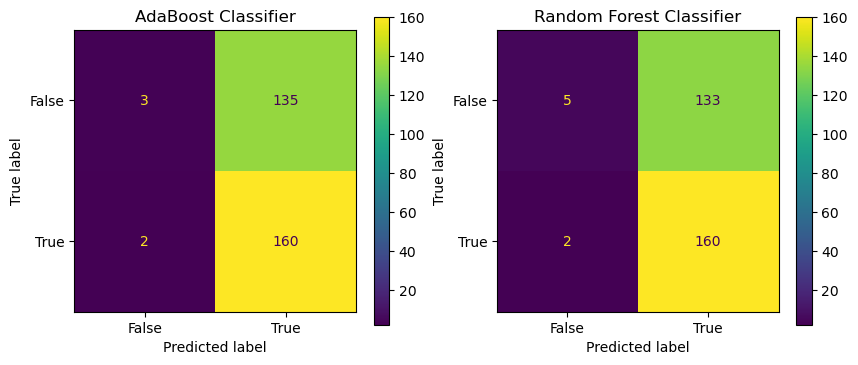

In [22]:
f, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first confusion matrix
axes[0].set_title("AdaBoost Classifier")
cm_ada = confusion_matrix(y_test, pred_ada)
ConfusionMatrixDisplay(cm_ada,
                       display_labels=['False', 'True'])\
    .plot(
        include_values=True,
        ax=axes[0])

# Plot the second confusion matrix
axes[1].set_title("Random Forest Classifier")
cm_rf = confusion_matrix(y_test, pred_rf)
ConfusionMatrixDisplay(cm_rf,
                       display_labels=['False', 'True'])\
    .plot(
        include_values=True,
        ax=axes[1])

plt.savefig('images/Task 1.png')
plt.show()
plt.close()

In [23]:
print('Accuracy:')
print(f'- AdaBoost Classifier     : {accuracy_score(y_test, pred_ada):.4f}')
print(f'- Random Forest Classifier: {accuracy_score(y_test, pred_rf):.4f}')
print('Recall:')
print(f'- AdaBoost Classifier     : {recall_score(y_test, pred_ada):.4f}')
print(f'- Random Forest Classifier: {recall_score(y_test, pred_rf):.4f}')
print('Precision:')
print(f'- AdaBoost Classifier     : {precision_score(y_test, pred_ada):.4f}')
print(f'- Random Forest Classifier: {precision_score(y_test, pred_rf):.4f}')
print('F1 Score:')
print(f'- AdaBoost Classifier     : {f1_score(y_test, pred_ada):.4f}')
print(f'- Random Forest Classifier: {f1_score(y_test, pred_rf):.4f}')

Accuracy:
- AdaBoost Classifier     : 0.5433
- Random Forest Classifier: 0.5500
Recall:
- AdaBoost Classifier     : 0.9877
- Random Forest Classifier: 0.9877
Precision:
- AdaBoost Classifier     : 0.5424
- Random Forest Classifier: 0.5461
F1 Score:
- AdaBoost Classifier     : 0.7002
- Random Forest Classifier: 0.7033


# Task 2

## Gender Predictor

In [24]:
data = pd.read_csv('Data/Supermarket Sales.csv')

In [25]:
data = data.drop('InvoiceID', axis=1)

In [26]:
X = data[['Branch', 'CustomerType', 'ProductType', 'UnitPrice', 'Quantity', 'Tax', 'Total', 'PaymentType', 'Rating']]
X['Branch'] = oe.fit_transform(X[['Branch']])
X['CustomerType'] = oe.fit_transform(X[['CustomerType']])
X['ProductType'] = oe.fit_transform(X[['ProductType']])
X['PaymentType'] = oe.fit_transform(X[['PaymentType']])

y = data['Gender']

/var/folders/r8/f01dqhx90rz4zgqvzjcy729r0000gn/T/ipykernel_17520/2097752414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Branch'] = oe.fit_transform(X[['Branch']])
/var/folders/r8/f01dqhx90rz4zgqvzjcy729r0000gn/T/ipykernel_17520/2097752414.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CustomerType'] = oe.fit_transform(X[['CustomerType']])
/var/folders/r8/f01dqhx90rz4zgqvzjcy729r0000gn/T/ipykernel_17520/2097752414.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)

### Decision Tree Predictor

In [28]:
from sklearn.tree import DecisionTreeClassifier

Hyper Parameter Tuning

In [29]:
model = DecisionTreeClassifier()

grid = {
    'max_features': ['sqrt', 'log2'], 
    'max_depth': [3, 6, 9, 15], 
    'max_leaf_nodes': [2, 5, 10], 
    'min_samples_leaf': [2, 3, 5, 8]
    } 

cv = RepeatedStratifiedKFold(
    n_splits=10,
    n_repeats=3,
    random_state=1
    )

In [30]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=grid,
    n_jobs=-1,
    cv=cv,
    scoring='accuracy'
    )

grid_result = grid_search.fit(X_train, y_train)

In [31]:
print(f"Highest Accuracy: {grid_result.best_score_:.4f}")
print(f"Hyper Parameter Values: {grid_result.best_params_}")

Highest Accuracy: 0.5033
Hyper Parameter Values: {'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_samples_leaf': 5}


Final Model

In [33]:
start_time = time.time()
dtc = DecisionTreeClassifier(
    max_depth=9,
    max_features='log2',
    max_leaf_nodes=10,
    min_samples_leaf=5,
    random_state=1
    )

dtc_model = dtc.fit(X_train, y_train)
end_time = time.time()
print(f'Execution Time: {end_time - start_time}')

Execution Time: 0.004419803619384766


### Random Forest Predictor

In [34]:
from sklearn.ensemble import RandomForestClassifier

Hyper Parameter Tuning

In [35]:
model = RandomForestClassifier()

grid = { 
    'n_estimators': [50, 100, 150], 
    'max_features': ['sqrt', 'log2'], 
    'max_depth': [3, 6, 9, 15], 
    'max_leaf_nodes': [2, 5, 10], 
    } 

cv = RepeatedStratifiedKFold(
    n_splits=10,
    n_repeats=3,
    random_state=1
    )

In [36]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=grid,
    n_jobs=-1,
    cv=cv,
    scoring='accuracy'
    )

grid_result = grid_search.fit(X_train, y_train)

In [37]:
print(f"Highest Accuracy: {grid_result.best_score_:.4f}")
print(f"Hyper Parameter Values: {grid_result.best_params_}")

Highest Accuracy: 0.5224
Hyper Parameter Values: {'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 10, 'n_estimators': 100}


Final Model

In [38]:
start_time = time.time()
rfc = RandomForestClassifier(
    max_depth=6,
    max_features='log2',
    max_leaf_nodes=10,
    n_estimators=100,
)

rfc_model = rfc.fit(X_train, y_train)
end_time = time.time()
print(f'Execution Time: {end_time - start_time}')

Execution Time: 0.09168171882629395


### Model Comparison

In [39]:
pred_dtc = dtc_model.predict(X_test)
pred_rfc = rfc_model.predict(X_test)

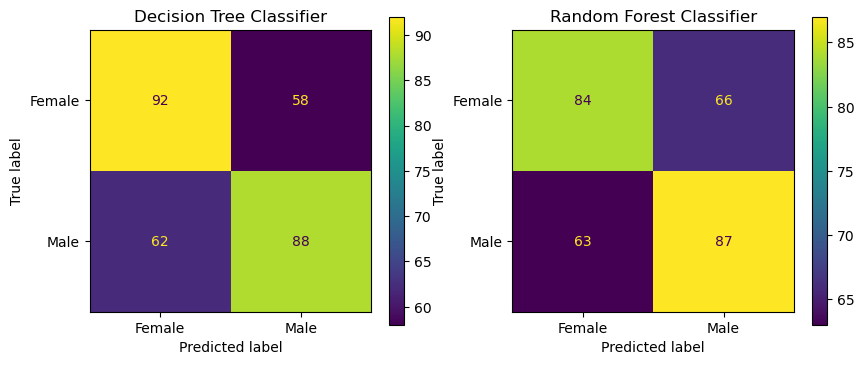

In [40]:
f, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first confusion matrix
axes[0].set_title("Decision Tree Classifier")
cm_dtc = confusion_matrix(y_test, pred_dtc)
ConfusionMatrixDisplay(cm_dtc,
                       display_labels=['Female', 'Male'])\
    .plot(
        include_values=True,
        ax=axes[0])

# Plot the second confusion matrix
axes[1].set_title("Random Forest Classifier")
cm_rfc = confusion_matrix(y_test, pred_rfc)
ConfusionMatrixDisplay(cm_rfc,
                       display_labels=['Female', 'Male'])\
    .plot(
        include_values=True,
        ax=axes[1])

plt.savefig('images/Task 2A.png')
plt.show()
plt.close()

In [41]:
print('Accuracy:')
print(f'- Decision Tree Classifier: {accuracy_score(y_test, y_pred=pred_dtc):.4f}')
print(f'- Random Forest Classifier: {accuracy_score(y_test, pred_rfc):.4f}')
print('Recall:')
print(f"- Decision Tree Classifier: {recall_score(y_test, pred_dtc, pos_label='Male'):.4f}")
print(f"- Random Forest Classifier: {recall_score(y_test, pred_rfc, pos_label='Male'):.4f}")
print('Precision:')
print(f"- Decision Tree Classifier: {precision_score(y_test, pred_dtc, pos_label='Male'):.4f}")
print(f"- Random Forest Classifier: {precision_score(y_test, pred_rfc, pos_label='Male'):.4f}")
print('F1 Score:')
print(f"- Decision Tree Classifier: {f1_score(y_test, pred_dtc, pos_label='Male'):.4f}")
print(f"- Random Forest Classifier: {f1_score(y_test, pred_rfc, pos_label='Male'):.4f}")

Accuracy:
- Decision Tree Classifier: 0.6000
- Random Forest Classifier: 0.5700
Recall:
- Decision Tree Classifier: 0.5867
- Random Forest Classifier: 0.5800
Precision:
- Decision Tree Classifier: 0.6027
- Random Forest Classifier: 0.5686
F1 Score:
- Decision Tree Classifier: 0.5946
- Random Forest Classifier: 0.5743


## Rating Predictor

In [42]:
data = pd.read_csv('Data/Supermarket Sales.csv')

In [43]:
data = data.drop('InvoiceID', axis=1)

In [44]:
X = data[['Branch', 'CustomerType', 'ProductType', 'UnitPrice', 'Quantity', 'Tax', 'Total', 'PaymentType', 'Gender']]
X['Branch'] = oe.fit_transform(X[['Branch']])
X['CustomerType'] = oe.fit_transform(X[['CustomerType']])
X['ProductType'] = oe.fit_transform(X[['ProductType']])
X['PaymentType'] = oe.fit_transform(X[['PaymentType']])
X['Gender'] = oe.fit_transform(X[['Gender']])

y = data['Rating']

/var/folders/r8/f01dqhx90rz4zgqvzjcy729r0000gn/T/ipykernel_17520/1179788602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Branch'] = oe.fit_transform(X[['Branch']])
/var/folders/r8/f01dqhx90rz4zgqvzjcy729r0000gn/T/ipykernel_17520/1179788602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CustomerType'] = oe.fit_transform(X[['CustomerType']])
/var/folders/r8/f01dqhx90rz4zgqvzjcy729r0000gn/T/ipykernel_17520/1179788602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)

### Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

Final Model

In [49]:
start_time = time.time()
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
end_time = time.time()
print(f'Execution Time: {end_time - start_time}')

Execution Time: 0.0016798973083496094


In [50]:
print(f"Intercept: {lin_reg.intercept_}")
print(f"Coefficients: {lin_reg.coef_}")

Intercept: 6.547981457474257
Coefficients: [ 5.66160866e-02 -1.27878875e-02 -1.16013065e-02  8.59907186e-03
  1.00556066e-01 -9.26284356e-05 -1.94519715e-03  2.41954803e-02
 -7.19095053e-02]


### Decison Tree Regressor

In [51]:
from sklearn.tree import DecisionTreeRegressor

Hyper Parameter Tuning

In [58]:
model = DecisionTreeRegressor()

grid = {
    "splitter":["best", "random"],
    "max_depth" : [3, 6, 9, 15],
    "min_samples_leaf":[2, 5, 10],
    "min_weight_fraction_leaf":[0.1 * i for i in range(1, 5 + 1)],
    "max_features":["log2", "sqrt"],
    "max_leaf_nodes":[2, 5, 10]
    }

In [59]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=grid,
    scoring='neg_mean_squared_error'
    )

grid_result = grid_search.fit(X_train, y_train)

In [60]:
print(f"Highest Accuracy: {grid_result.best_score_}")
print(f"Hyper Parameter Values: {grid_result.best_params_}")

Highest Accuracy: -2.933370800444673
Hyper Parameter Values: {'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.2, 'splitter': 'random'}


Final Model

In [61]:

start_time = time.time()
dt_reg = DecisionTreeRegressor(
    max_depth=15,
    max_features='log2',
    max_leaf_nodes=2,
    min_samples_leaf=2,
    min_weight_fraction_leaf=0.2,
    splitter='random',
    random_state=1)

dt_reg.fit(X_train, y_train)
end_time = time.time()
print(f'Execution Time: {end_time - start_time}')

Execution Time: 0.0029401779174804688


### Model Comparison

In [64]:
pred_lr = lin_reg.predict(X_test)
pred_dtr = dt_reg.predict(X_test)

In [66]:
print('RMSE Loss:')
print(f'- Linear Regression      : {mse_loss(input=torch.Tensor(pred_lr), target=torch.Tensor(y_test.values)) ** 0.5}')
print(f'- Decision Tree Regressor: {mse_loss(input=torch.Tensor(pred_dtr), target=torch.Tensor(y_test.values)) ** 0.5}')

RMSE Loss:
- Linear Regression      : 1.7418664693832397
- Decision Tree Regressor: 1.7256680727005005
